In [ ]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"surabhigovil","key":"4b4a01fbc79aa74ee86dab961f0653f5"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
! chmod 600 /root/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d 'tanlikesmath/diabetic-retinopathy-resized'

diabetic-retinopathy-resized.zip: Skipping, found more recently modified local copy (use --force to force download)


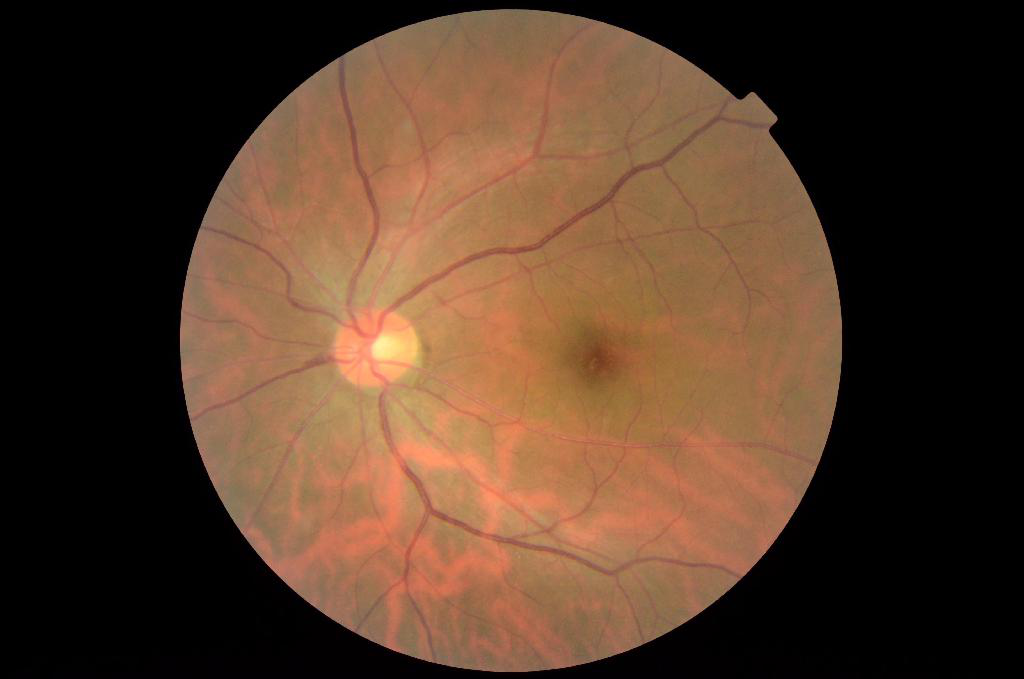

In [ ]:
import os
os.listdir('/content/train_images/resized_train/resized_train/16547_right.jpeg')


In [ ]:
import zipfile
from google.colab import files


import matplotlib.pyplot as plt
import numpy as np
import os
import PIL

In [ ]:
! mkdir train_images

mkdir: cannot create directory ‘train_images’: File exists


In [ ]:
! unzip diabetic-retinopathy-resized.zip -d train_images

Archive:  diabetic-retinopathy-resized.zip
replace train_images/resized_train/resized_train/10003_left.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd

train = pd.read_csv('/content/train_images/trainLabels.csv')

train.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


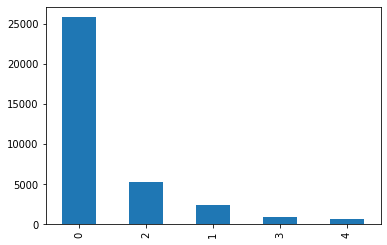

In [ ]:
train["level"].value_counts().plot(kind="bar")

In [ ]:
# import the necessary packages
from skimage.measure import compare_ssim as ssim
import matplotlib.pyplot as plt
import numpy as np
import skimage.io as si
from skimage.io import imread, imshow
from skimage.color import rgb2gray

In [ ]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((skimage.img_as_float(imageA) - skimage.img_as_float(imageB)) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err
def compare_images(imageA, imageB, title):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
	s = ssim(imageA, imageB)
	# setup the figure
	fig = plt.figure(title)
	plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")
	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")
	# show the images
	plt.show()


In [ ]:
# load the images -- the original, the original + contrast,
# and the original + photoshop
right = si.imread("/content/train_images/resized_train/resized_train/16547_right.jpeg")
left = si.imread("/content/train_images/resized_train/resized_train/16547_left.jpeg")

# convert the images to grayscale
right_grayscale = rgb2gray(right)
left_grayscale = rgb2gray(left)


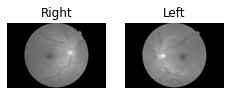

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  from ipykernel import kernelapp as app


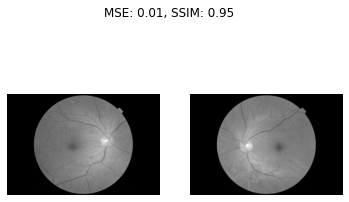

In [ ]:
# initialize the figure
fig = plt.figure("Images")
images = ("Right", right_grayscale), ("Left", left_grayscale)
# loop over the images
for (i, (name, image)) in enumerate(images):
	# show the image
	ax = fig.add_subplot(1, 3, i + 1)
	ax.set_title(name)
	plt.imshow(image, cmap = plt.cm.gray)
	plt.axis("off")
# show the figure
plt.show()
# compare the images
compare_images(right_grayscale, left_grayscale, "Right vs. Left")

2. Gaussian Filtered Retina Images Dataset: https://www.kaggle.com/sovitrath/diabetic-retinopathy-224x224-gaussian-filtered



In [5]:
! kaggle datasets download -d sovitrath/diabetic-retinopathy-224x224-gaussian-filtered

100% 425M/427M [00:20<00:00, 19.0MB/s]
100% 427M/427M [00:20<00:00, 21.5MB/s]


In [6]:
import zipfile
from google.colab import files


import matplotlib.pyplot as plt
import numpy as np
import os
import PIL

In [7]:
! mkdir gaussian_images

In [ ]:
! unzip diabetic-retinopathy-224x224-gaussian-filtered.zip -d gaussian_images

In [ ]:
import os

path = '/content/gaussian_images/gaussian_filtered_images/gaussian_filtered_images/'

os.listdir(path + "Severe")

In [49]:
import pandas as pd

train_gaussian = pd.read_csv('/content/gaussian_images/train.csv')

train_gaussian.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


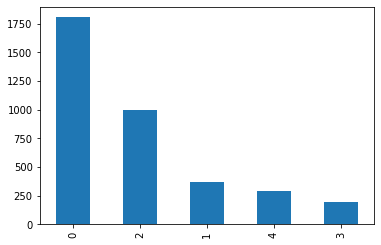

In [50]:
train_gaussian["diagnosis"].value_counts().plot(kind="bar")

In [89]:
# import the necessary packages
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import skimage
import skimage.io as si
from skimage.color import rgb2gray
import cv2

In [90]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	err = np.sum((skimage.img_as_float(imageA) - skimage.img_as_float(imageB)) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err
def compare_images(imageA, imageB, title):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
	s = ssim(imageA, imageB)
	# setup the figure
	fig = plt.figure(title)
	plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")
	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")
	# show the images
	plt.show()

In [91]:
# load the images 

path = '/content/gaussian_images/gaussian_filtered_images/gaussian_filtered_images/'

no_dr = cv2.imread(os.path.join((path + 'No_DR'), '39f8935185e6.png'))
mild = cv2.imread(os.path.join((path + 'Mild'), '5633ced07d8e.png'))
moderate = cv2.imread(os.path.join((path + 'Moderate'), '3a61e690f4bb.png'))
severe = cv2.imread(os.path.join((path + 'Severe'), 'ad2f0b9d059c.png'))
proliferate_dr = cv2.imread(os.path.join((path + 'Proliferate_DR'), '0ceb222f6629.png'))

# resizing the images for consistency
no_dr = cv2.resize(no_dr, (400,400))
mild = cv2.resize(mild, (400,400))
moderate = cv2.resize(moderate, (400,400))
severe = cv2.resize(severe, (400,400))
proliferate_dr = cv2.resize(proliferate_dr, (400,400))

# convert the images to grayscale
no_dr = cv2.cvtColor(no_dr, cv2.COLOR_BGR2GRAY)
mild = cv2.cvtColor(mild, cv2.COLOR_BGR2GRAY)
moderate = cv2.cvtColor(moderate, cv2.COLOR_BGR2GRAY)
severe = cv2.cvtColor(severe, cv2.COLOR_BGR2GRAY)
proliferate_dr = cv2.cvtColor(proliferate_dr, cv2.COLOR_BGR2GRAY)

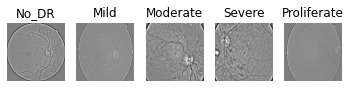

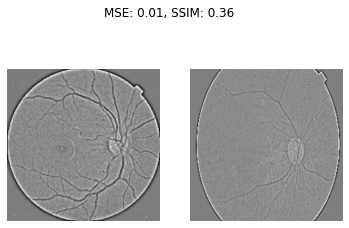

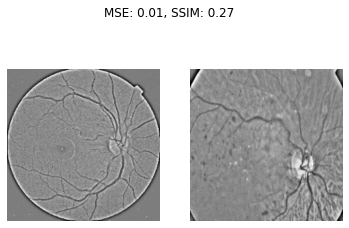

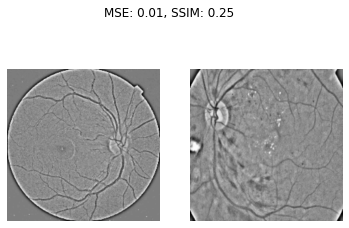

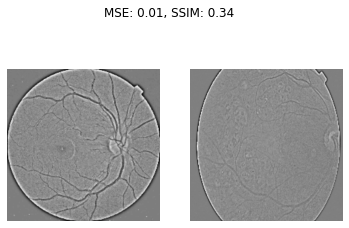

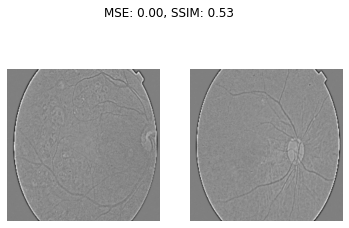

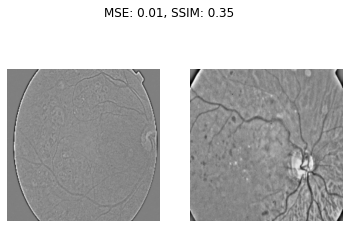

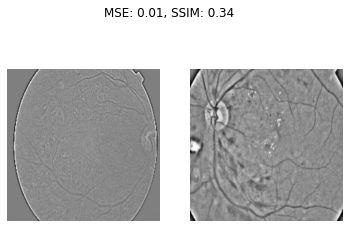

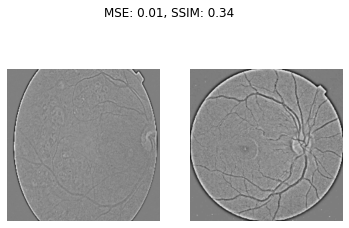

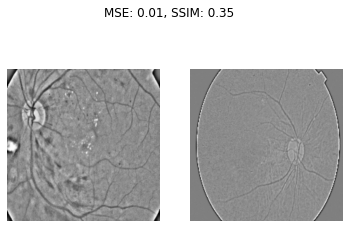

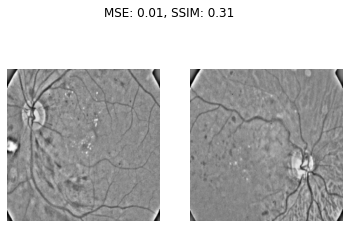

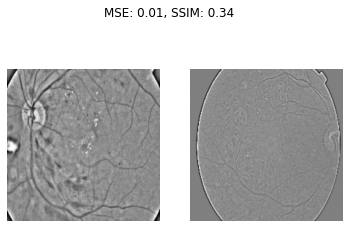

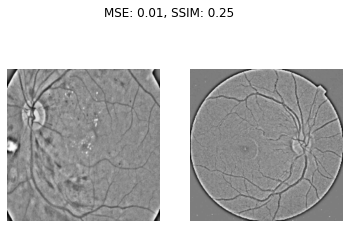

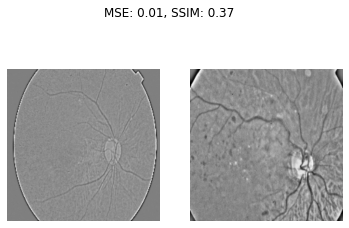

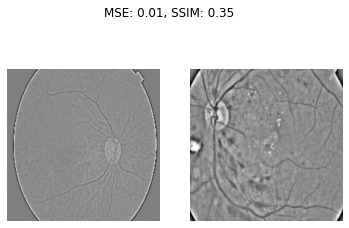

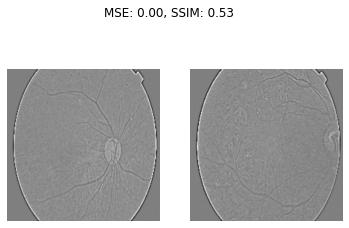

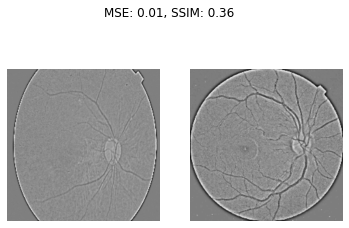

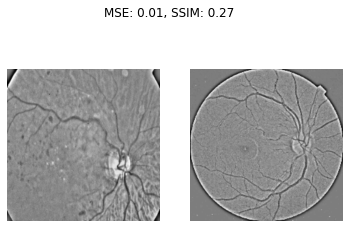

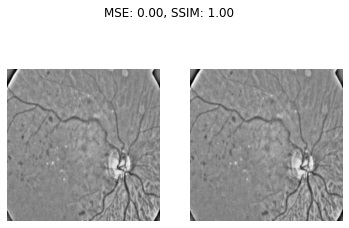

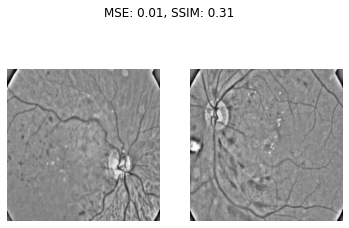

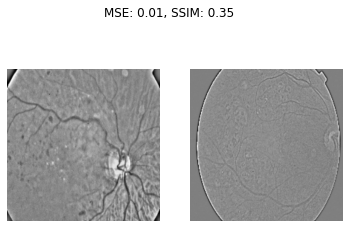

In [92]:
# initialize the figure
fig = plt.figure("Diabetic Retina Images Compared by Severity")
images = ("No_DR", no_dr), ("Mild", mild), ("Moderate", moderate), ("Severe", severe), ("Proliferate", proliferate_dr)
# loop over the images
for (i, (name, image)) in enumerate(images):
	# show the image
	ax = fig.add_subplot(1, 5, i + 1)
	ax.set_title(name)
	plt.imshow(image, cmap = plt.cm.gray)
	plt.axis("off")
# show the figure
plt.show()
# compare the images
compare_images(no_dr, mild, "No_DR vs. Mild")
compare_images(no_dr, moderate, "No_DR vs. Moderate")
compare_images(no_dr, severe , "No_DR vs. Severe")
compare_images(no_dr, proliferate_dr, "No_DR vs. Proliferate")
compare_images(proliferate_dr, mild, "Proliferate vs. Mild")
compare_images(proliferate_dr, moderate, "Proliferate vs. Moderate")
compare_images(proliferate_dr, severe, "Proliferate vs. Severe")
compare_images(proliferate_dr, no_dr, "Proliferate vs. No_DR")
compare_images(severe, mild, "Sever vs. Mild")
compare_images(severe, moderate, "Severe vs. Moderate")
compare_images(severe, proliferate_dr, "Severe vs. Proliferate_DR")
compare_images(severe, no_dr, "Severe vs. No_DR")
compare_images(mild, moderate, "Mild vs Moderate")
compare_images(mild, severe, "Mild vs. Severe")
compare_images(mild, proliferate_dr, "Mild vs. Proliferate_DR")
compare_images(mild, no_dr, "Mild vs. No_DR")
compare_images(moderate, no_dr, "Moderate vs. No_DR")
compare_images(moderate, moderate, "Moderate vs Mild")
compare_images(moderate, severe, "Moderate vs. Severe")
compare_images(moderate, proliferate_dr, "Moderate vs. Proliferate_DR")